<a href="https://colab.research.google.com/github/PriyanshuJoshi1982/IPL-Prediction/blob/main/Model_1_Toss_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset
df = pd.read_csv('/content/M1_Team_Toss_Winner.csv')  # Replace with filename

# Step 2: Inspect and prepare data
print(df.head())
print(df.columns)

# Example: encoding categorical features (adjust as per dataset)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 3: Select features and target
X = df.drop('toss_winner', axis=1)  # Replace with actual target column
y = df['toss_winner']               # Replace with actual target column

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Predict probability of toss win
probs = model.predict_proba(X_test)
print("Sample Toss Win Probabilities:\n", probs[:5])

# Optional: map back to team names if encoded
if 'toss_winner' in label_encoders:
    print("Decoded Predictions:", label_encoders['toss_winner'].inverse_transform(y_pred[:5]))


                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner  
0  Royal Challengers Bangalore  
1          Chennai Super Kings  
2             Rajasthan Royals  
3               Mumbai Indians  
4              Deccan Chargers  
Index(['team1', 'team2', 'toss_winner'], dtype='object')
Accuracy: 0.182648401826484
              precision    recall  f1-score   support

           0       0.41      0.64      0.50        33
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
           3       0.07      0.09      0.08        11
           4       0.00      0.00      0.00         7
           5 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

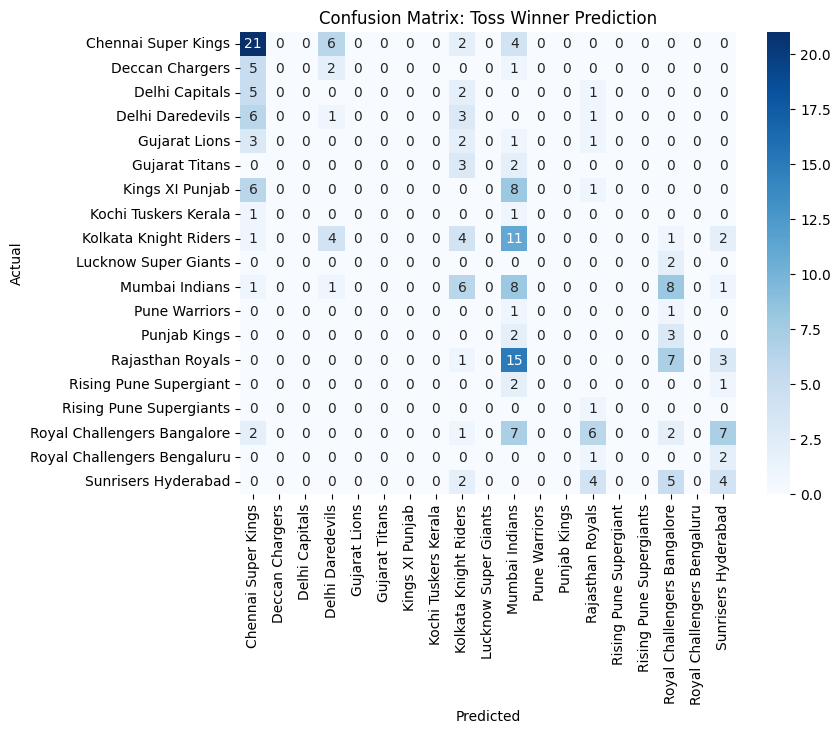

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_encoders['toss_winner'].classes_,
            yticklabels=label_encoders['toss_winner'].classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Toss Winner Prediction")
plt.show()